In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [42]:
def GD(x0, fn, fn_deriv, alpha, epsilon, max_iter):

    for i in range(max_iter):
        d_x0 = fn_deriv(x0)

        if d_x0 < epsilon:                                                  # Termination Condition
            print(f"Converged after {i} iteration")
            break

        x0 = x0 - alpha * d_x0

    print(f"GD Results with x0 ={x0}, lr={alpha}, epsilon={epsilon}")
    print(f"Found solution after {i} iterations.")
    print(f"x_min = {x0}")
    print(f"Gradient = {d_x0}")
    return x0, i, d_x0

In [43]:
def Newton(x0, fn, d1_fn, d2_fn, alpha, epsilon, max_iter):

    for i in range(max_iter):

        d_x0 = d1_fn(x0)


        x0_new = x0 - alpha * (d1_fn(x0) / d2_fn(x0))


        # if np.abs(fn(x0_new) - fn(x0)) < epsilon:                                                  # Termination Condition
        # if np.abs(x0_new - x0) < epsilon:                                                  # Termination Condition
        if d_x0 < epsilon:                                                  # Termination Condition
            print(f"Converged after {i} iteration")
            x0 = x0_new
            break

        x0 = x0_new


    print(f"Newton Results with x0 ={x0}, lr={alpha}, epsilon={epsilon}")
    print(f"Found solution after {i} iterations.")
    print(f"x_min = {x0}")
    print(f"Gradient = {d_x0}")
    return x0, i, d_x0
# Newton(40, fn, d1_fn, d2_fn, .8, .1, 10000)

In [44]:
fn = lambda x : x **2 - 15 * x + 1
d1_fn = lambda x : 2 * x - 15
d2_fn = lambda x : 2

In [45]:
x = np.linspace(-50, 70, 1000)

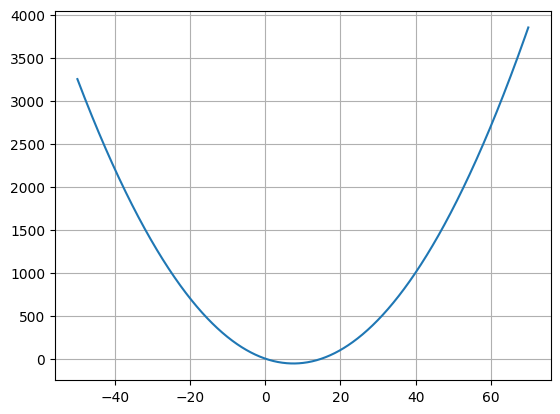

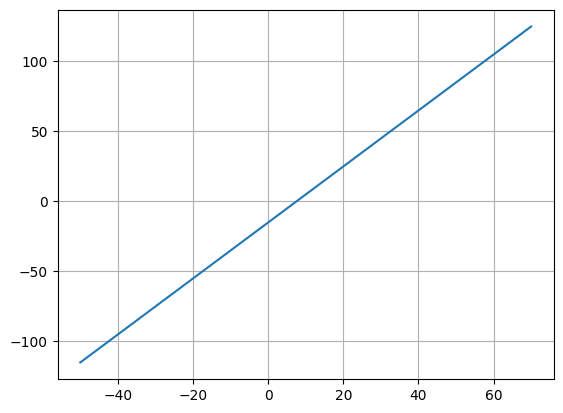

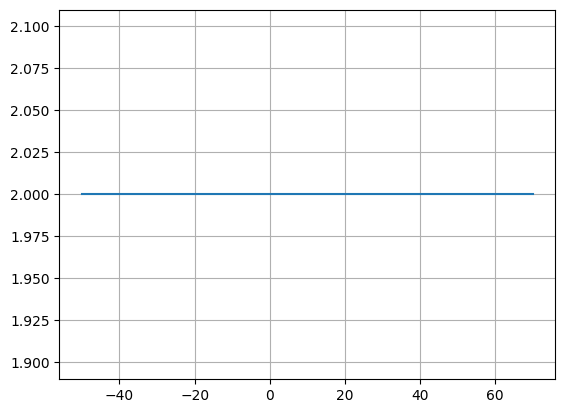

In [46]:
plt.plot(x, fn(x))
plt.grid()

plt.figure()
plt.plot(x, d1_fn(x))
plt.grid()

plt.figure()
# plt.plot(x, np.full((1000,), 2))
plt.plot(x, np.repeat(2, len(x)))
plt.grid()

In [47]:
GD(40, fn, d1_fn, .01, .1, 10000)

Converged after 321 iteration
GD Results with x0 =7.549596800192111, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


(7.549596800192111, 321, 0.09919360038422198)

In [48]:
Newton(40, fn, d1_fn, d2_fn, 1, .1, 10000)

Converged after 1 iteration
Newton Results with x0 =7.5, lr=1, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


(7.5, 1, 0.0)

In [49]:
Newton(40, fn, d1_fn, d2_fn, .8, .1, 10000)

Converged after 5 iteration
Newton Results with x0 =7.50208, lr=0.8, epsilon=0.1
Found solution after 5 iterations.
x_min = 7.50208
Gradient = 0.020799999999999486


(7.50208, 5, 0.020799999999999486)

### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [50]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

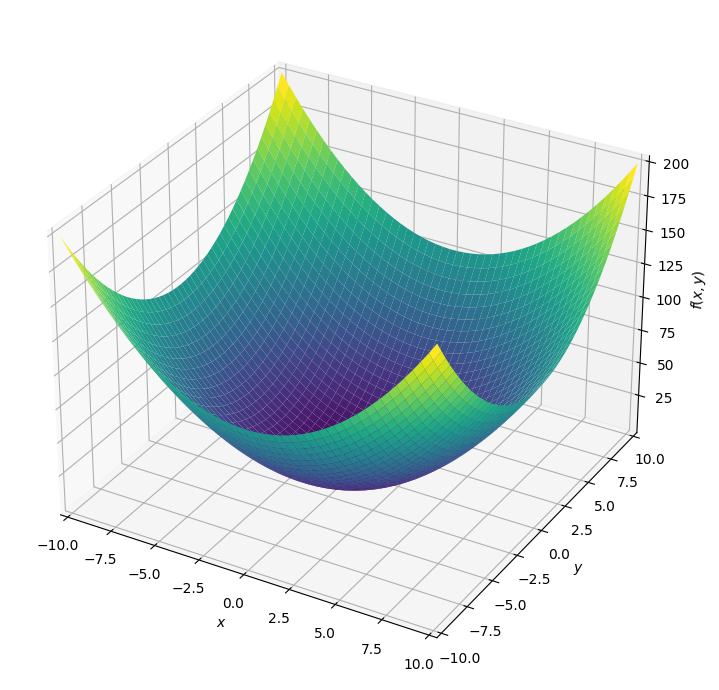

In [51]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

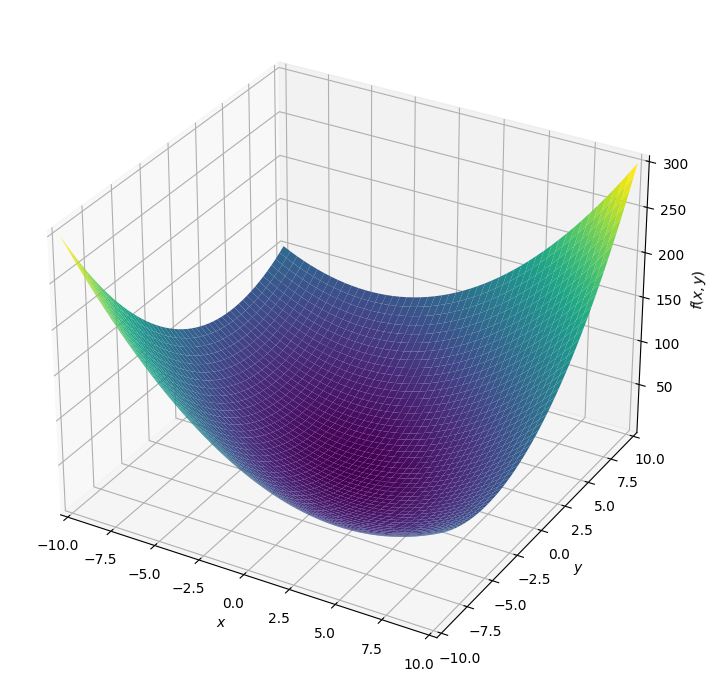

In [52]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$

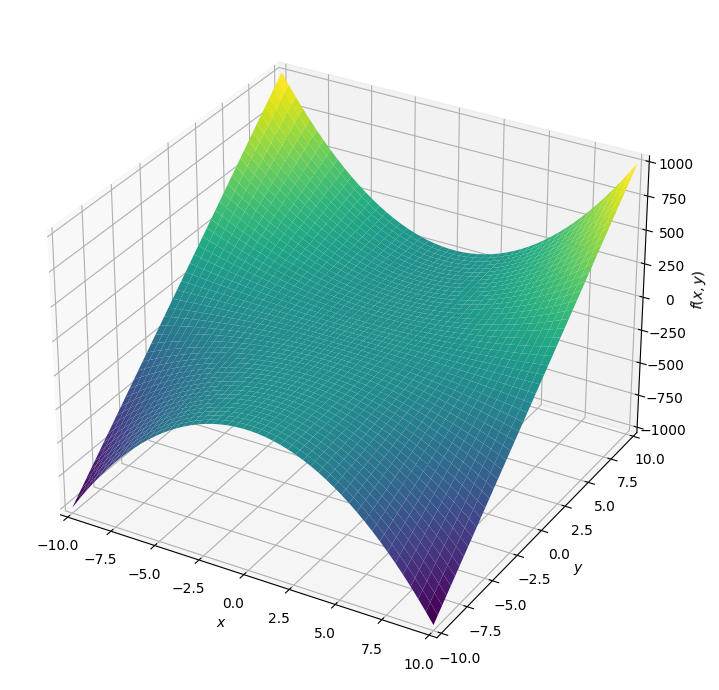

In [53]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [54]:
fn = lambda x, y : x**2 + y**2


In [55]:
def GDM(x0, fn, fn_dx, fn_dy, alpha, epsilon, max_iter):
    x0 = np.array(x0)
    for i in range(max_iter):
        dx = fn_dx(*x0)
        dy = fn_dy(*x0)
        grad = np.array([dx, dy])
        grad_norm = np.linalg.norm(grad)

        if grad_norm < epsilon:                                                  # Termination Condition
            print(f"Converged after {i} iteration")
            break

        x0 = x0 - alpha * grad

    print(f"GD Results with x0 ={x0}, lr={alpha}, epsilon={epsilon}")
    print(f"Found solution after {i} iterations.")
    print(f"xy_min = {x0}")
    print(f"Gradient = {grad}")
    return x0, i, grad

In [56]:
def NewtonM(x0, fn, fn_d1, fn_d2, alpha, epsilon, max_iter):
    x0 = np.array(x0).reshape(-1, 1)
    for i in range(max_iter):

        grad = fn_d1(*x0).reshape(-1, 1)
        grad_norm = np.linalg.norm(grad)
        # print(f"grad_norm {grad_norm}")

        # if np.abs(fn(x0_new) - fn(x0)) < epsilon:                                                  # Termination Condition
        # if np.abs(x0_new - x0) < epsilon:                                                  # Termination Condition
        if grad_norm < epsilon:                                                  # Termination Condition
            print(f"Converged after {i} iteration")
            break


        h_inv = np.linalg.inv(fn_d2(*x0))

        dotpro = np.matmul(h_inv, grad)
        x0 = x0 - alpha * dotpro


    print(f"Newton Results with x0 ={x0}, lr={alpha}, epsilon={epsilon}")
    print(f"Found solution after {i} iterations.")
    print(f"x_min = \n{x0}")
    print(f"Gradient = \n{grad}")
    return x0, i, grad
# Newton(40, fn, d1_fn, d2_fn, .8, .1, 10000)

In [57]:
fn_1 = lambda x, y : x**2 + y**2
fn_d1_1 = lambda x,y : np.array([[2 * x], [2 * y]])
fn_d2_1 = lambda x,y : np.array([[2, 0],[0, 2]])
fn_d1_1(2,2).shape, fn_d2_1(2,2).shape

((2, 1), (2, 2))

In [58]:
fn_2 = lambda x, y : x**2 + y**2 + x * y
fn_d1_2 = lambda x,y : np.array([[2 * x + y], [2 * y + x]])
fn_d2_2 = lambda x,y : np.array([[2, 1],[1, 2]])
fn_d1_2(2,2).shape, fn_d2_2(2,2).shape

((2, 1), (2, 2))

In [59]:
fn_3 = lambda x, y : x**2 * y
fn_d1_3 = lambda x,y : np.array([[2 * x * y], [x ** 2]])
fn_d2_3 = lambda x,y : np.array([[2 * y, 2 * x],[2 * x, 0]])

In [60]:
GDM((10, 10), lambda x, y : x**2 + y**2, lambda x,y : 2 * x, lambda x,y : 2 * y, .1,.001, 1000);

Converged after 46 iteration
GD Results with x0 =[0.00034845 0.00034845], lr=0.1, epsilon=0.001
Found solution after 46 iterations.
xy_min = [0.00034845 0.00034845]
Gradient = [0.0006969 0.0006969]


In [61]:
GDM((10, 10), lambda x, y : x**2 + y**2, lambda x,y : 2 * x, lambda x,y : 2 * y, .5,.001, 1000);

Converged after 1 iteration
GD Results with x0 =[0. 0.], lr=0.5, epsilon=0.001
Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [62]:
NewtonM((10, 10), fn_1, fn_d1_1, fn_d2_1, 1, .001, 10);

Converged after 1 iteration
Newton Results with x0 =[[0.]
 [0.]], lr=1, epsilon=0.001
Found solution after 1 iterations.
x_min = 
[[0.]
 [0.]]
Gradient = 
[[0.]
 [0.]]


In [63]:
NewtonM((10, 10), fn_1, fn_d1_1, fn_d2_1, .5, .001, 100);

Converged after 15 iteration
Newton Results with x0 =[[0.00030518]
 [0.00030518]], lr=0.5, epsilon=0.001
Found solution after 15 iterations.
x_min = 
[[0.00030518]
 [0.00030518]]
Gradient = 
[[0.00061035]
 [0.00061035]]


In [64]:
GDM((10, 10), lambda x, y : x**2 + x * y + y**2, lambda x,y : 2 * x + y, lambda x,y : 2 * y + x, .5, .001, 1000);

Converged after 16 iteration
GD Results with x0 =[0.00015259 0.00015259], lr=0.5, epsilon=0.001
Found solution after 16 iterations.
xy_min = [0.00015259 0.00015259]
Gradient = [0.00045776 0.00045776]


In [65]:
NewtonM((10, 10), fn_1, fn_d1_1, fn_d2_1, 1, .001, 1000);

Converged after 1 iteration
Newton Results with x0 =[[0.]
 [0.]], lr=1, epsilon=0.001
Found solution after 1 iterations.
x_min = 
[[0.]
 [0.]]
Gradient = 
[[0.]
 [0.]]


In [66]:
GDM((10, 10), lambda x, y : x**2 + x * y + y**2, lambda x,y : 2 * x + y, lambda x,y : 2 * y + x, .5, .001, 1000);

Converged after 16 iteration
GD Results with x0 =[0.00015259 0.00015259], lr=0.5, epsilon=0.001
Found solution after 16 iterations.
xy_min = [0.00015259 0.00015259]
Gradient = [0.00045776 0.00045776]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [67]:
x0 = np.array((10, 10)).reshape(-1, 1)
# x0 = np.array((10, 10))
print(x0[0][0], x0[1][0])

10 10


In [92]:
def BFGD(xk, x0, fn, fn_d1, alpha, epsilon, max_iter):
    x0 = np.array(x0).reshape(-1, 1)
    xk = np.array(xk).reshape(-1, 1)

    b_inv = np.identity(2)
    for i in range(1, max_iter):

        grad = fn_d1(*x0).reshape(-1, 1)
        grad_norm = np.linalg.norm(grad)
        # print(f"grad_norm {grad_norm}")

        # if np.abs(fn(x0_new) - fn(x0)) < epsilon:                                                  # Termination Condition
        # if np.abs(x0_new - x0) < epsilon:                                                  # Termination Condition
        if grad_norm < epsilon or np.abs(np.linalg.norm(fn_d1(*x0) - np.linalg.norm(fn_d1(*xk)))) < epsilon:                                                  # Termination Condition
        # if grad_norm < epsilon :                                                  # Termination Condition
            print(f"Converged after {i} iteration")
            break

        # print(f"X0 : \n{x0}")
        # print(f"Xk : \n{xk}")
        # print(f"dfxn : \n {fn_d1(*x0)}")
        # print(f"dfxn-1 : \n {fn_d1(*xk)}")
        # print(f"grad : \n {grad_norm}")
        # print(f"b_inv : \n {b_inv}")


        delta_x = x0 - xk
        y = (fn_d1(*x0) - fn_d1(*xk)).reshape(-1, 1)
        dnum = np.dot(y.T, delta_x)[0]
        t1 = (np.identity(2) - np.matmul(delta_x, y.T) / dnum)
        t2 = (np.identity(2) - (np.dot(y, delta_x.T) / dnum))
        t3 = np.matmul(delta_x, delta_x.T) / dnum
        # print(dnum, dnum.shape)
        # print(f'dx : {delta_x.shape}, y : {y.shape}, t1 : {t1.shape}, t2 : {t2.shape}, t3 : {t3.shape}')
        # print(f'dx : {delta_x.flatten()}, y : {y.flatten()}, t1 : {t1.flatten()}, t2 : {t2.flatten()}, t3 : {t3.flatten()}')

        # b_inv = np.matmul(np.matmul(t1, b_inv), t2) + t3
        b_inv = (t1 @ b_inv @ t2) + t3
        xk = x0
        x0 = x0 - alpha * np.matmul(b_inv, grad)
        # print(f'b_inv : {b_inv.shape}, xk : {xk.shape}, x0 : {x0.shape}')

    # print(f"Newton Results with x0 ={x0}, lr={alpha}, epsilon={epsilon}")
    print(f"Found solution after {i} iterations.")
    print(f"x_min = \n {x0}")
    print(f"Gradient = \n {grad}")
    return x0, i, grad

In [93]:
BFGD((9, 9), (10, 10), fn_1, fn_d1_1, 1, .001, 1000);

Converged after 2 iteration
Found solution after 2 iterations.
x_min = 
 [[0.]
 [0.]]
Gradient = 
 [[0.]
 [0.]]


In [94]:
BFGD((9, 9), (10, 10), fn_2, fn_d1_2, 1, .001, 1000);

Converged after 2 iteration
Found solution after 2 iterations.
x_min = 
 [[3.55271368e-15]
 [1.77635684e-15]]
Gradient = 
 [[8.88178420e-15]
 [7.10542736e-15]]


In [95]:
BFGD((9, 9), (10, 10), fn_1, fn_d1_1, .9, .001, 1000);

Converged after 6 iteration
Found solution after 6 iterations.
x_min = 
 [[1.e-04]
 [1.e-04]]
Gradient = 
 [[0.0002]
 [0.0002]]


In [96]:
BFGD((10, 10), (9, 9), fn_3, fn_d1_3, 1, .001, 1000);

Converged after 14 iteration
Found solution after 14 iterations.
x_min = 
 [[0.01534004]
 [0.01534004]]
Gradient = 
 [[0.00047063]
 [0.00023532]]
